<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Customer Segmentation


---



##Project description

The goal of the project is to divide credit card users into clusters. The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

The dataset is cleaned and I can focus on building the model.

I will use k-means algorithm.

The dataset has the following features:

`customer_id` : unique identifier for each customer.

`age` : customer age in years.

`gender` : customer gender (M or F).

`dependent_count` : number of dependents of each customer.

`education_level` : level of education ("High School", "Graduate", etc.).

`marital_status` : marital status ("Single", "Married", etc.).

`estimated_income` : the estimated income for the customer projected by the data science team.

`months_on_book` : time as a customer in months.

`total_relationship_count` : number of times the customer contacted the company.

`months_inactive_12_mon` : number of months the customer did not use the credit card in the last 12 months.

`credit_limit` : customer's credit limit.

`total_trans_amount` : the overall amount of money spent on the card by the customer.

`total_trans_count` : the overall number of times the customer used the card.

`avg_utilization_ratio` : daily average utilization ratio.

##1. Preparing the environment and uploading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
np.set_printoptions(precision=3, suppress=False)
pd.options.display.precision = 3

*Uploading the data from a file*

In [3]:
raw_data = pd.read_csv('customer_segmentation.csv')
customers = raw_data.copy()

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

The optimally big data set : over 100k elements.

14 columns

Unnecessary columns : `customer_id`

3 categorial variables : `gender`, (to 0-1 encode) `education_level` (to level encode), `martial_status` (fillna + 0-1 encode).

Missing values : "unknown" (7.4%) in the `martial_status` column.

In [4]:
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [6]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10127.0,7.392e+08,3.690e+07,7.081e+08,7.130e+08,7.179e+08,7.731e+08,8.283e+08
age,10127.0,4.633e+01,8.017e+00,2.600e+01,4.100e+01,4.600e+01,5.200e+01,7.300e+01
dependent_count,10127.0,2.346e+00,1.299e+00,0.000e+00,1.000e+00,2.000e+00,3.000e+00,5.000e+00
estimated_income,10127.0,6.208e+04,3.937e+04,2.000e+04,3.200e+04,5.000e+04,8.000e+04,2.000e+05
months_on_book,10127.0,3.593e+01,7.986e+00,1.300e+01,3.100e+01,3.600e+01,4.000e+01,5.600e+01
total_relationship_count,10127.0,3.813e+00,1.554e+00,1.000e+00,3.000e+00,4.000e+00,5.000e+00,6.000e+00
months_inactive_12_mon,10127.0,2.341e+00,1.011e+00,0.000e+00,2.000e+00,2.000e+00,3.000e+00,6.000e+00
credit_limit,10127.0,8.632e+03,9.089e+03,1.438e+03,2.555e+03,4.549e+03,1.107e+04,3.452e+04
total_trans_amount,10127.0,4.404e+03,3.397e+03,5.100e+02,2.156e+03,3.899e+03,4.741e+03,1.848e+04
total_trans_count,10127.0,6.486e+01,2.347e+01,1.000e+01,4.500e+01,6.700e+01,8.100e+01,1.390e+02


In [13]:
corr = customers.iloc[:, 1:].corr(numeric_only=True)

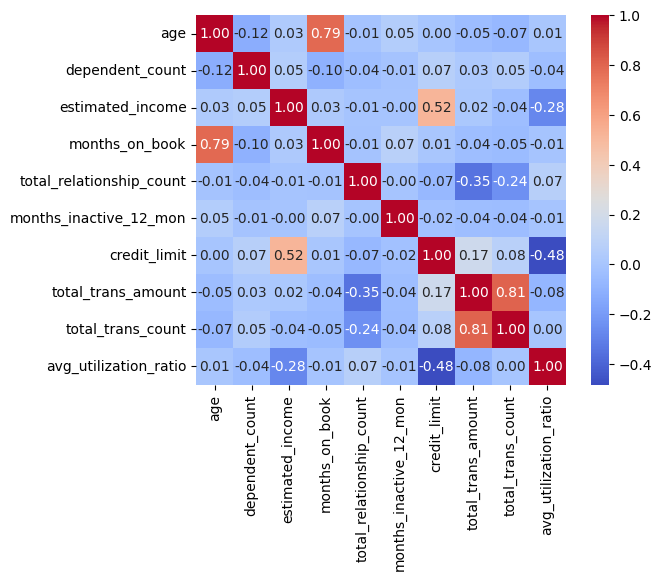

In [17]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [49]:
numeric_cols = list(customers.select_dtypes(include='number').columns)[1:]
len(numeric_cols)

10

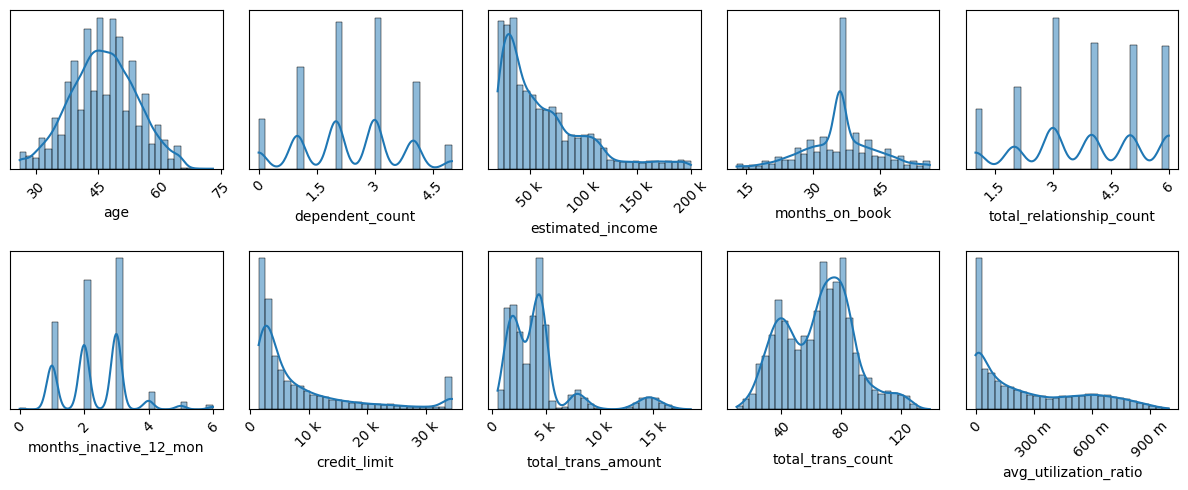

In [69]:
from matplotlib.ticker import MaxNLocator, EngFormatter

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

axes = axes.flat

for i, col in enumerate(numeric_cols):
  sns.histplot(customers[col], bins=30, kde=True, ax=axes[i])
  axes[i].xaxis.set_major_locator(MaxNLocator(nbins=4))
  axes[i].xaxis.set_major_formatter(EngFormatter())
  axes[i].tick_params(axis='x', rotation=45)
  axes[i].set_ylabel('')
  axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [28]:
plots

##2. Feature engineering

In [121]:
customers = raw_data.copy()

In [122]:
customers['gender'] = customers['gender'].map({'M' : 1, 'F' : 0})
customers['education_level'] = customers['education_level'].map(
    {'Uneducated' : 0, 'High School' : 1, 'College' : 2,
     'Graduate' : 3, 'Post-Graduate' : 3, 'Doctorate' : 4}
    )

In [123]:
customers = customers + pd.get_dummies(customers['marital_status'], prefix='marital')\
  .drop('marital_Unknown', axis=1)

I didn't drop the rows with the 'Unknown' marital status. Instead, I 0-1 encoded the column, hiding the 'Unknown' status.

In [124]:
customers.columns

Index(['age', 'avg_utilization_ratio', 'credit_limit', 'customer_id',
       'dependent_count', 'education_level', 'estimated_income', 'gender',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_status', 'months_inactive_12_mon', 'months_on_book',
       'total_relationship_count', 'total_trans_amount', 'total_trans_count'],
      dtype='object')